<br>Nama : Muhamad Abdulah Ridwan
<br>Kelas : Pagi C
<br>Nim : 221351084

In [101]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df = pd.read_csv('net_detection.csv')

In [103]:
df.head()

,src_ip,dst_ip,protocol,src_port,dst_port,bytes_sent,bytes_received,duration,packet_count,attack_type
0,39.170.115.188,133.204.219.238,TCP,1762,62458,3422,5989,213,131,normal
1,80.35.125.105,246.113.106.207,TCP,32718,9699,3736,989,277,96,normal
2,49.134.137.30,151.26.62.67,TCP,1225,43970,2865,5943,305,89,ddos
3,157.51.229.193,175.153.3.55,TCP,20804,303,1852,9389,552,80,normal
4,121.123.112.174,72.234.63.118,UDP,15457,17942,8318,5160,533,46,normal


In [104]:
# menghitung jumlah data yang ada pada kolom protocol
protocol_counts = df ['protocol'].value_counts()
protocol_counts

protocol
TCP     676
UDP     674
ICMP    650
Name: count, dtype: int64

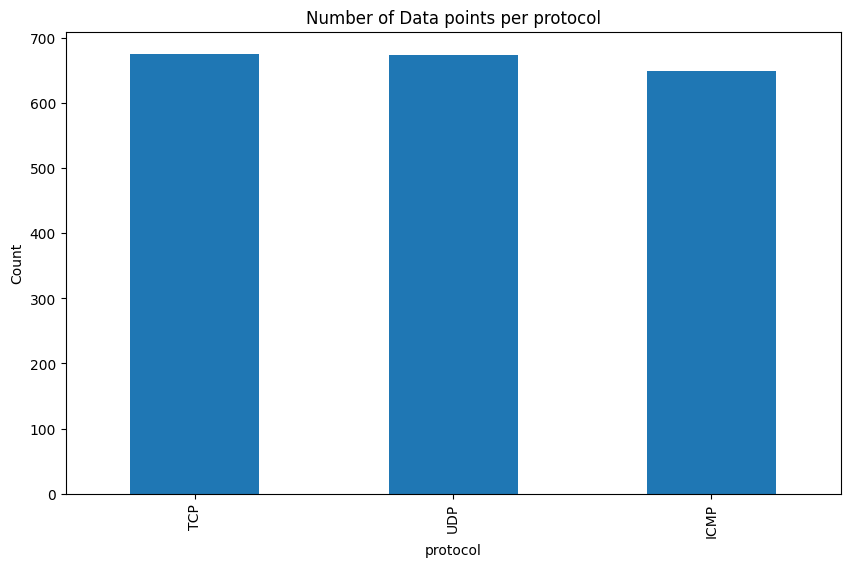

In [105]:
#membuat bar plot hasil perhitungan kolom protocol
plt.figure(figsize=(10, 6 ))
protocol_counts.plot(kind = 'bar')
plt.title('Number of Data points per protocol')
plt.xlabel('protocol')
plt.ylabel('Count')
plt.show()


In [131]:
attack_type_counts = df['attack_type'].value_counts()
print(attack_type_counts)


attack_type
normal         1842
ddos             43
brute_force      43
icmp_flood       40
port_scan        32
Name: count, dtype: int64


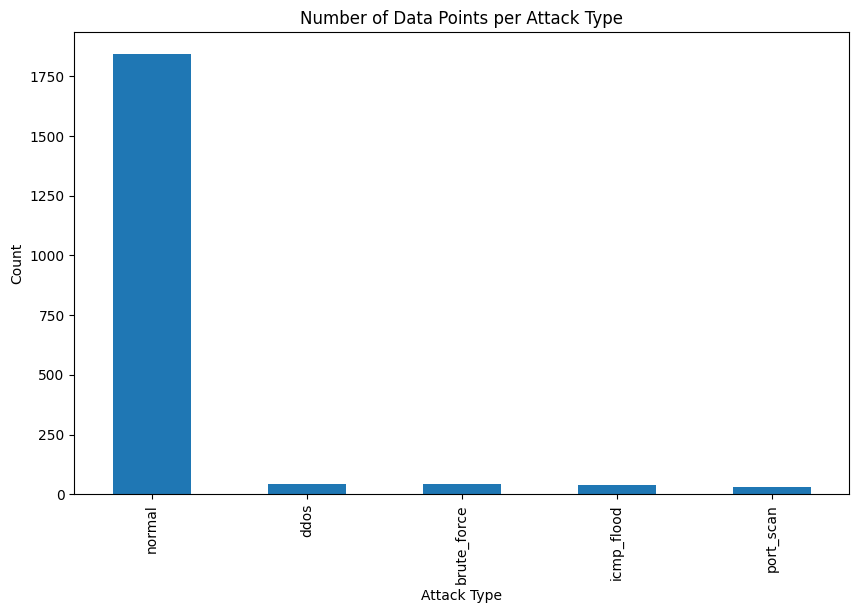

In [132]:
plt.figure(figsize=(10, 6))
attack_type_counts.plot(kind='bar')
plt.title('Number of Data Points per Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()

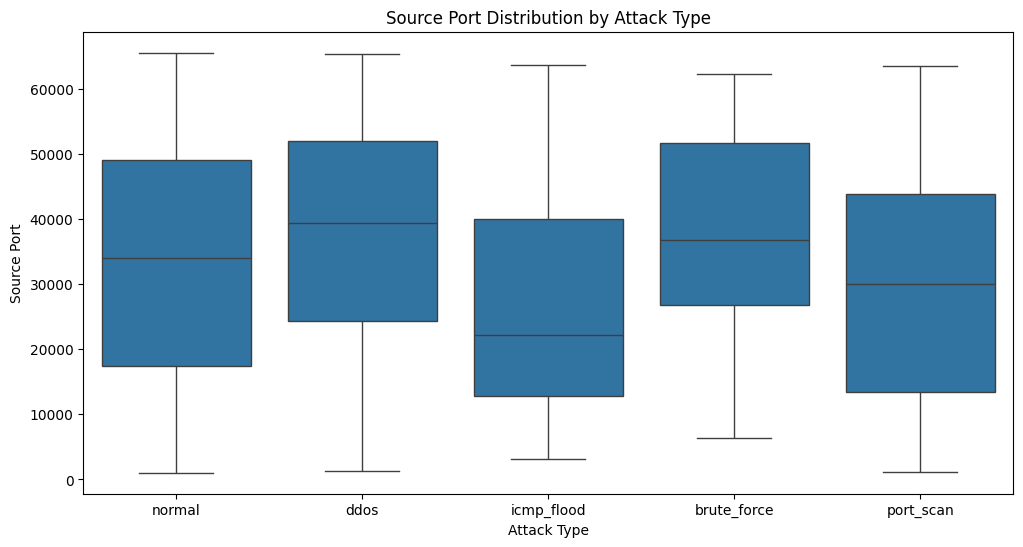

In [106]:
#membuat box plot untuk menampilkan rata -rata nilai source plot berdasarkan jenis Attack Type
plt.figure(figsize= (12, 6))
sns.boxplot(x='attack_type', y = 'src_port', data=df)
plt.title('Source Port Distribution by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Source Port')
plt.show()

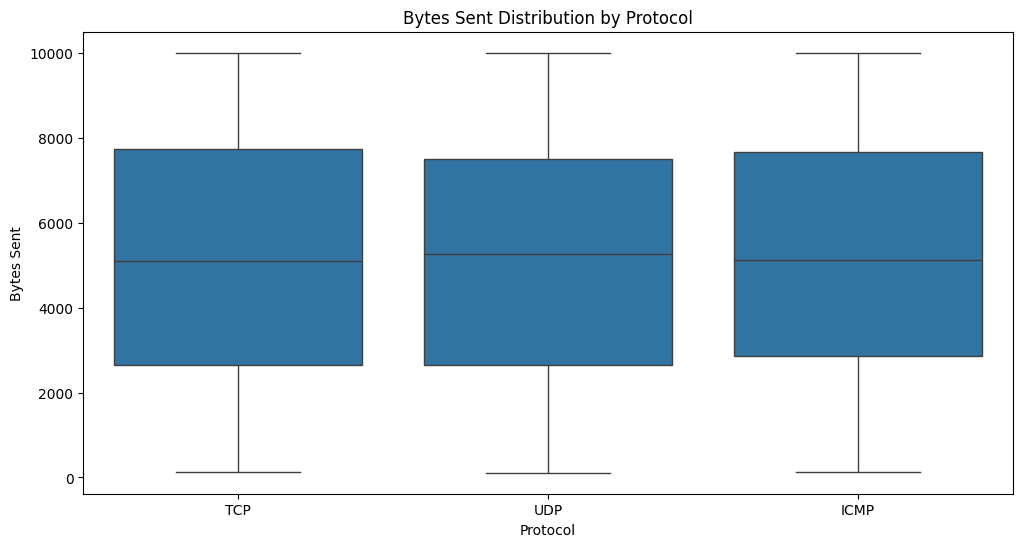

In [133]:
#boxplot untuk menampilkan bytest_sent dan berdasarkan jenis protocol
plt.figure(figsize=(12, 6))
sns.boxplot(x='protocol', y='bytes_sent', data=df)
plt.title('Bytes Sent Distribution by Protocol')
plt.xlabel('Protocol')
plt.ylabel('Bytes Sent')
plt.show()


# Model

In [108]:
# pilih fitur untuk clustering 
features = ['src_port', 'dst_port', 'bytes_sent', 'bytes_received']
X =df [features]

In [109]:
# Standardize the data 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)

In [110]:
# implementasi algoritma DBSCAN
# tentukan nilai epsilon dan min sample 
dbscan = DBSCAN (eps=0.5, min_samples=5) 
df['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

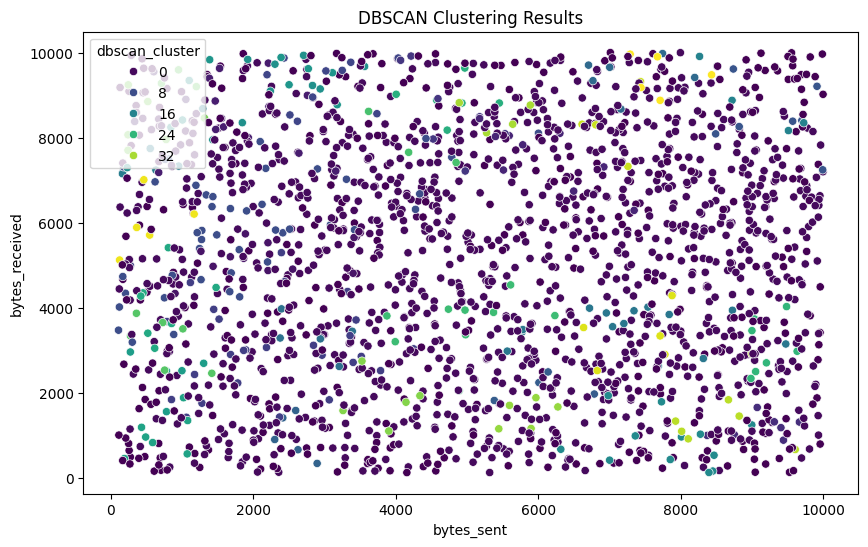

In [111]:
# Plot hasil cluster 
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='bytes_sent', y='bytes_received',
                   hue="dbscan_cluster", data=df,
                   palette='viridis')
plt.title('DBSCAN Clustering Results') 
plt.show()

In [112]:
df.head()

,src_ip,dst_ip,protocol,src_port,dst_port,bytes_sent,bytes_received,duration,packet_count,attack_type,dbscan_cluster
0,39.170.115.188,133.204.219.238,TCP,1762,62458,3422,5989,213,131,normal,-1
1,80.35.125.105,246.113.106.207,TCP,32718,9699,3736,989,277,96,normal,0
2,49.134.137.30,151.26.62.67,TCP,1225,43970,2865,5943,305,89,ddos,-1
3,157.51.229.193,175.153.3.55,TCP,20804,303,1852,9389,552,80,normal,-1
4,121.123.112.174,72.234.63.118,UDP,15457,17942,8318,5160,533,46,normal,0


In [113]:
#memisahkan data anomaly yang bernilai -1
df['anomaly'] =df['dbscan_cluster'] == -1

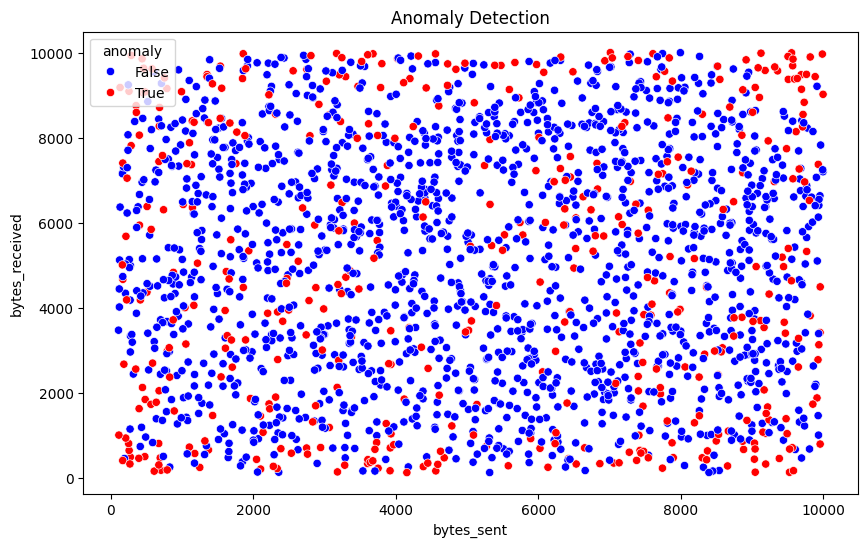

In [114]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='bytes_sent', y='bytes_received',
                hue='anomaly', data=df,
                palette=['blue', 'red'])
plt.title('Anomaly Detection')
plt.show()

In [115]:
df.head()

,src_ip,dst_ip,protocol,src_port,dst_port,bytes_sent,bytes_received,duration,packet_count,attack_type,dbscan_cluster,anomaly
0,39.170.115.188,133.204.219.238,TCP,1762,62458,3422,5989,213,131,normal,-1,True
1,80.35.125.105,246.113.106.207,TCP,32718,9699,3736,989,277,96,normal,0,False
2,49.134.137.30,151.26.62.67,TCP,1225,43970,2865,5943,305,89,ddos,-1,True
3,157.51.229.193,175.153.3.55,TCP,20804,303,1852,9389,552,80,normal,-1,True
4,121.123.112.174,72.234.63.118,UDP,15457,17942,8318,5160,533,46,normal,0,False


In [116]:
#simpan hasil cluster
df.to_csv('hasil_dbscan.csv', index=False)

In [117]:
# membuat df untuk type serangan ddos 
ddos_df = df[df['attack_type'] == 'ddos']

In [118]:
# hitung jumlah anomalynya 
anomaly_counts = ddos_df ['anomaly'].value_counts()
anomaly_counts

anomaly
False    35
True      8
Name: count, dtype: int64

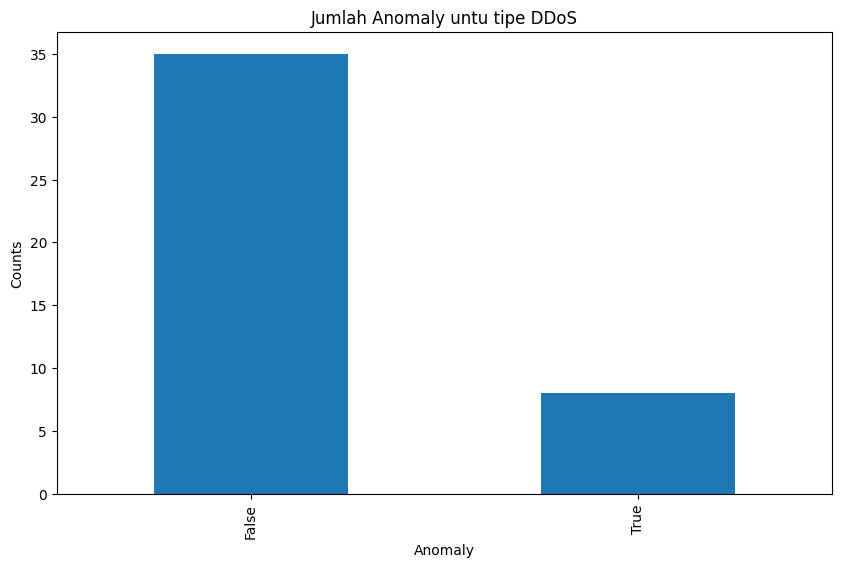

In [119]:
# bar plot untuk serangan DDOS
plt.figure(figsize=(10,6))
anomaly_counts.plot(kind='bar')
plt.title('Jumlah Anomaly untu tipe DDoS')
plt.xlabel('Anomaly')
plt.ylabel('Counts')
plt.show()

In [120]:
brute_force_df = df[df['attack_type'] == 'brute_force']

In [121]:
anomaly_counts_brute_force = brute_force_df['anomaly'].value_counts()
print(anomaly_counts_brute_force)


anomaly
False    35
True      8
Name: count, dtype: int64


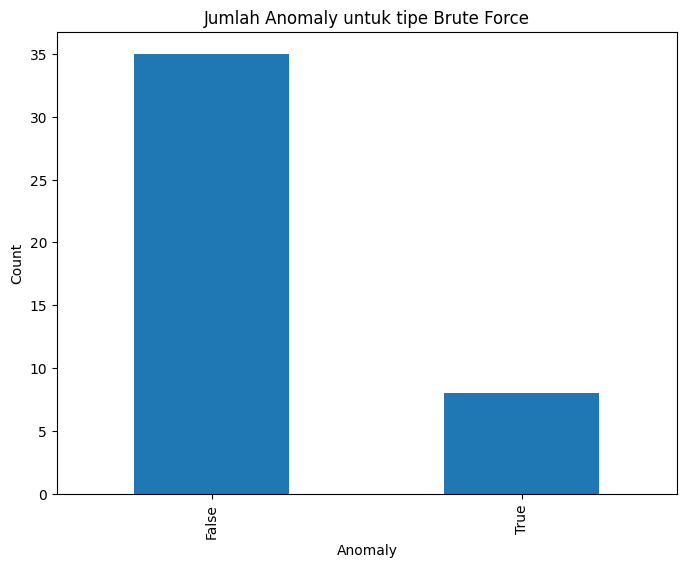

In [122]:
plt.figure(figsize=(8, 6))
anomaly_counts_brute_force.plot(kind='bar')
plt.title('Jumlah Anomaly untuk tipe Brute Force')
plt.xlabel('Anomaly')
plt.ylabel('Count')
plt.show()

In [123]:
icmp_flood_df = df[df['attack_type'] == 'icmp_flood']


In [124]:
anomaly_counts_icmp_flood = icmp_flood_df['anomaly'].value_counts()
print(anomaly_counts_icmp_flood)

anomaly
False    36
True      4
Name: count, dtype: int64


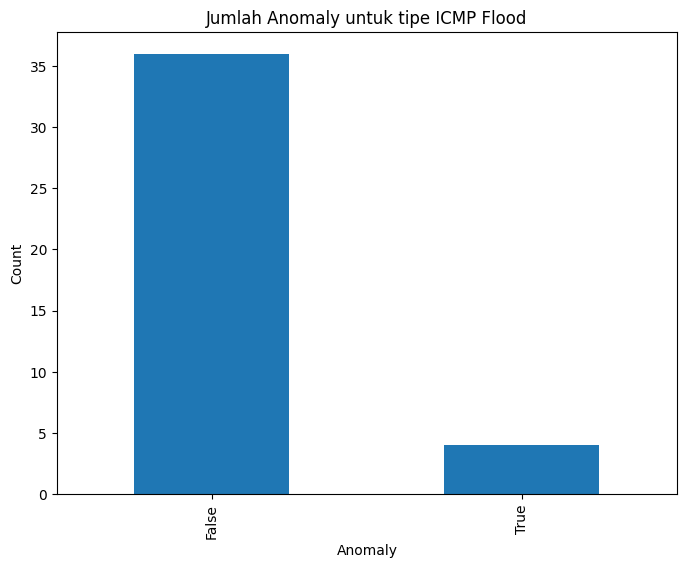

In [125]:
plt.figure(figsize=(8, 6))
anomaly_counts_icmp_flood.plot(kind='bar')
plt.title('Jumlah Anomaly untuk tipe ICMP Flood')
plt.xlabel('Anomaly')
plt.ylabel('Count')
plt.show()

In [126]:
port_scan_df = df[df['attack_type'] == 'port_scan']

In [127]:
anomaly_counts_port_scan = port_scan_df['anomaly'].value_counts()
print(anomaly_counts_port_scan)

anomaly
False    23
True      9
Name: count, dtype: int64


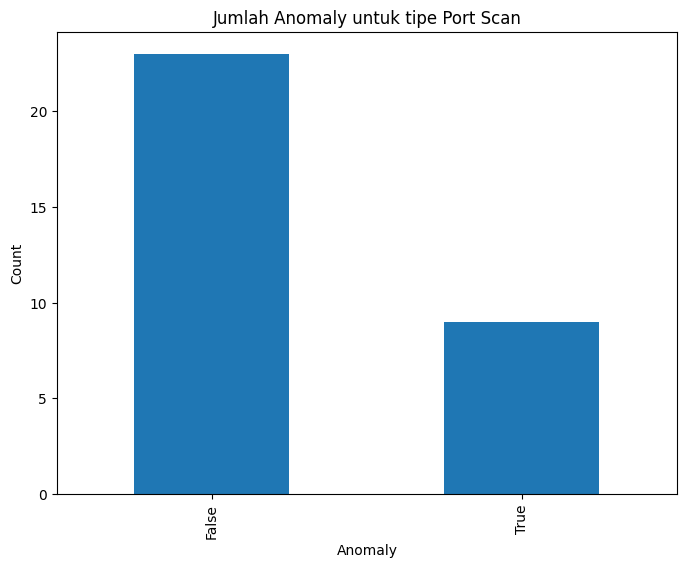

In [128]:
plt.figure(figsize=(8, 6))
anomaly_counts_port_scan.plot(kind='bar')
plt.title('Jumlah Anomaly untuk tipe Port Scan')
plt.xlabel('Anomaly')
plt.ylabel('Count')
plt.show()